In [1]:
import torch
import torch.nn as nn

from model_factories import get_golem_model, get_resnet18_model, get_resnet34_model, get_vitbase_model
from dataloaders import get_dataloaders
from model_utils import train_epoch, eval, getBestModelParams
from plotter import plot_images, plot_metrics

In [2]:
device = torch.device(
        "mps"
        if torch.backends.mps.is_available()
        else "cuda" if torch.cuda.is_available() else "cpu"
    )

# CIFAR-10 TEST RUN

In [8]:
train_loader, test_loader, classes = get_dataloaders(test_run=True)
CLASSES_NUM = len(classes)
EPOCHS = 5

## Optimal Model Hyperparameters

In [9]:
gc = get_golem_model(CLASSES_NUM)
gc.to(device)

# lr, loss, criterion, optim = getBestModelParams(gc, train_loader, device)
# print(f"Optim lr: {lr}\nLoss: {loss}\nBest optim: {optim}\nBest loss func: {criterion}")

# LR = lr

LR = 1e-3
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam

## Sceanrio 1 - Custom Backbone

In [10]:
gc = get_golem_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [11]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

1/5: loss=2985.721933364868
2/5: loss=2253.122405409813
3/5: loss=2070.36282235384
4/5: loss=1976.8036379218102
5/5: loss=1921.0353883504868


Custom backbone results: 
Avg loss 1.2085763145559512
Accu 0.5825999975204468
Precision 0.33999999999999997
Recall 0.5833333333333333
F-score 0.24666666666666667



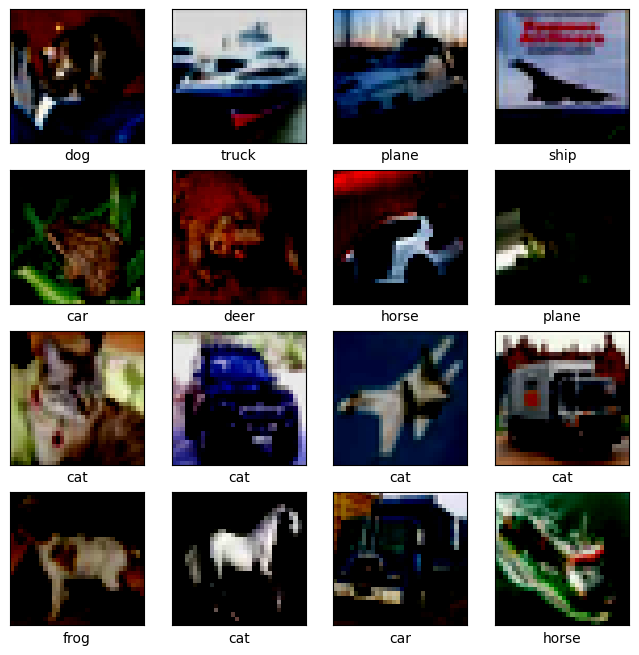

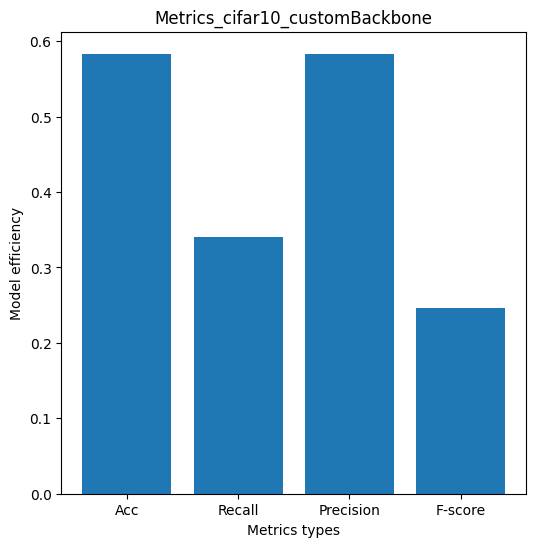

In [12]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("Custom backbone results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title="Classification_cifar10_customBackbone")
plot_metrics(metrics, title="Metrics_cifar10_customBackbone")

## Scenario 2 - ResNet18

In [9]:
gc = get_resnet18_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet18 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

# plot_images(images, preds, classes)
plot_metrics(metrics, title="Metrics_cifar10_resnet18")

## Scenario 3 - ResNet34

In [12]:
gc = get_resnet34_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet34 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

# plot_images(images, preds, classes)
plot_metrics(metrics, title="Metrics_cifar10_resnet34")

# Scenario 4 - ViTbase

In [15]:
gc = get_vitbase_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ViTbase results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

# plot_images(images, preds, classes)
plot_metrics(metrics, title="Metrics_cifar10_vitbase")

# CIFAR-100

In [11]:
train_loader, test_loader, classes = get_dataloaders(test_run=False)
CLASSES_NUM = len(classes)
EPOCHS = 10

## Optimal Model Hyperparameters

In [ ]:
gc = get_golem_model(CLASSES_NUM)
gc.to(device)

# lr, loss, criterion, optim = getBestModelParams(gc, train_loader, device)
# print(f"Optim lr: {lr}\nLoss: {loss}\nBest optim: {optim}\nBest loss func: {criterion}")

# LR = lr

LR = 1e-3
criterion = nn.CrossEntropyLoss
optim = torch.optim.Adam



## Sceanrio 1 - Custom Backbone

In [ ]:
gc = get_golem_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("Custom backbone results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

# plot_images(images, preds, classes)
plot_metrics(metrics, title="Metrics_cifar100_customBackbone")

## Scenario 2 - ResNet18

In [22]:
gc = get_resnet18_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet18 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

# plot_images(images, preds, classes)
plot_metrics(metrics, title="Metrics_cifar100_resnet18")

## Scenario 3 - ResNet34

In [25]:
gc = get_resnet34_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet34 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

# plot_images(images, preds, classes)
plot_metrics(metrics, title="Metrics_cifar100_resnet34")

# Scenario 4 - ViTbase

In [ ]:
gc = get_vitbase_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [ ]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

In [ ]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ViTbase results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

# plot_images(images, preds, classes)
plot_metrics(metrics, title="Metrics_cifar100_vitbase")